# Week 14 Lab: Elements of k-means and PCA, and applications.
 - Simple k-menas
 - Simple pca
 - pca on Iris data set
 - pca on MNIST
 - k-means on MNIST in two dimensions
## Part 1. Simple case of k-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

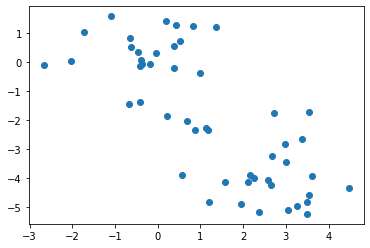

In [3]:
plt.scatter(X[:,0],X[:,1])

### How many clusters are in above scatter plot?
### K = 2

In [4]:
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [5]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

### K = 3

In [6]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [7]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

In [8]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

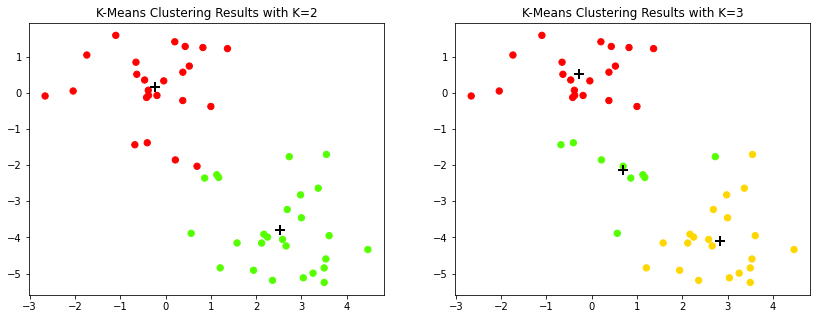

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

## Part 2 Simple case of PCA
### We first get the concept of variance. 

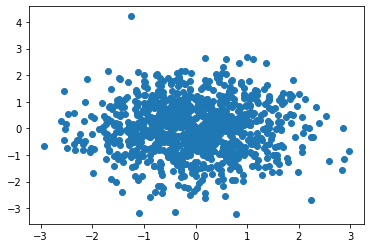

In [12]:
mean = [0, 0]
cov0 = [[1, 0.0], [0.0, 1]]

X0 = np.random.multivariate_normal(mean, cov0, size=(1000))

plt.scatter(X0[:,0],X0[:,1])

In [13]:
np.var(X0,axis=0)

array([0.9569638 , 0.97715073])

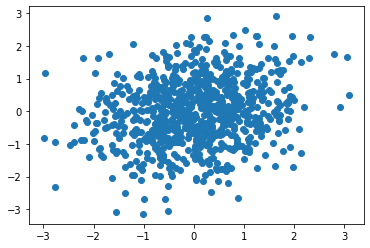

In [14]:
mean = [0, 0]
cov = [[1, 0.2], [0.2, 1]]

X1 = np.random.multivariate_normal(mean, cov, size=(800))

plt.scatter(X1[:,0],X1[:,1])

In [15]:
np.var(X1,axis=0)

array([0.9654444 , 0.98708471])

## We shall use PCA to find the direction with large variance
### Hint. The distribution looks like an oval with its principal axes along (1,1) and (1,-1)
### The extent along (1,1) seems larger than the extent along (1,-1)

In [16]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(X)
print(model.components_)

[[-0.56934021  0.82210201]
 [-0.82210201 -0.56934021]]


In [19]:
X1_transform = model.transform(X1)
np.var(X1_transform,axis=0)

array([0.78612429, 1.16640482])

### The above matrix can be interpreted as:
- The first component is a vector of (-0.701, -0.713)
- The second component is another of (0.713, -0.701)
- One is $\propto$ (1,1), the other $\propto$ (1,-1)

### Things you may try:
- Increase the size from 800 to 2000, you shall see the two axes shall be even closer to $(1,\pm 1)$.
- Or you can reduce the size to 100, you shall see a rather different set of components
- Why? If you want to take the mean of a distribution, a sample size of 100 is not going to be as good as size of 1000

## Part 3. Use PCA to visualize Iris data set
### Originally, the data set is used for classification, meaning that the machine learning model tries to label each data x. In Iris data set, there are 150 rows and 4 columns. In summary:
- Each data has 4 features
- Each y can be 0, 1, 2 (corresponds to a certain kind of flower)
- It would be hard to plot 4-dimensional data and group them into 3 clusters

## If we can extract two important predictos, that will be great. In general, we can write linear combination of the four predictors such as:

 - $z_1 = a_{11}x_1+a_{12}x_2+a_{13}x_3+a_{14}x_4$, 
 - $z_2 = a_{21}x_1+a_{22}x_2+a_{23}x_3+a_{24}x_4$,
 - $z_3 = a_{31}x_1+a_{32}x_2+a_{33}x_3+a_{34}x_4$,
 - $z_4 = a_{41}x_1+a_{42}x_2+a_{43}x_3+a_{44}x_4$.

## What PCA does is: find out the coefficients $a_{ij}$ such that $z_1$ contains the largest variance. $z_2$ second, $z_3$ third, and so on.



In [13]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

np.unique(y_iris)

array([0, 1, 2])

In [14]:
model_iris = PCA(n_components=2)
model_iris.fit(X_iris)

PCA(n_components=2)

In [15]:
X_transform = model_iris.transform(X_iris)

In [16]:
X_iris[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
X_transform[0:5,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

### Compare the X_iris and X_transform, the original data has 4 columns (each x has 4 components) and the transformed one has only 2. So we can plot the transformed data in two dimension. It shall help us visualize them and classify the data.

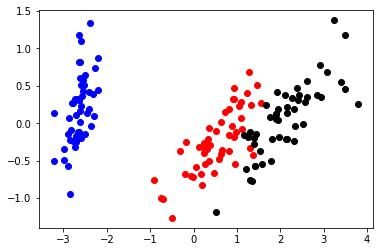

In [18]:
c=''

for i in range(len(X_transform)):
    if y_iris[i] == 0:
        c = 'bo'
    elif y_iris[i] == 1:
        c = 'ro'
    else:
        c = 'ko'
    plt.plot(X_transform[i,0],X_transform[i,1],c)

## Part 4. Applying PCA to visualize hand-written digits
 - A very well known data set: MINST hand-written digit image dataset
 - Use PCA to visualize images in two dimensional space
 - Task I: Build a pandas data frame for the image data
 - Task II: Select s subset of digits from data frame. Here the demo selects the 4 digits: '0', '4','6','9'. 
 - Task III: Use PCA and visualize these images using the first two coordinates.
 - Your task: Repeat the above to visualize any 4 of remaining digits you preferred. 

In [19]:
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()
print(digits.data.shape)

# There are 1797 images of digits from 0 to 9
# each image is saved as a row of 8x8=64 columns 

(1797, 64)


### The method .matshow is used to show the 8x8 images

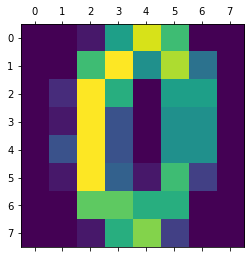

[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]
0


In [21]:
#plt.gray() 
plt.matshow(digits.images[10]) 
plt.show() 

# look into the object

# .data contains the information of image reshaped into a row of 64 columns
print(digits.data[10])

# .image is a matrix of 8x8 identical to .data
print(digits.images[10])

# .target contains the label for the digit
print(digits.target[10])

## Building the data frame for MNIST
 - Each image is stored in a row
 - Each image has 64 pixels, so each column represents a pixel
 - The last column stores the target, i.e. 0, 1, 2, ...

In [22]:
feat_cols = [ 'pixel'+str(i) for i in range(digits.data.shape[1]) ]
df = pd.DataFrame(digits.data,columns=feat_cols)
df['label'] = digits.target
df['label'] = df['label'].apply(lambda i: str(i))

In [23]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Randomly select 30 images from the data frame and show the images

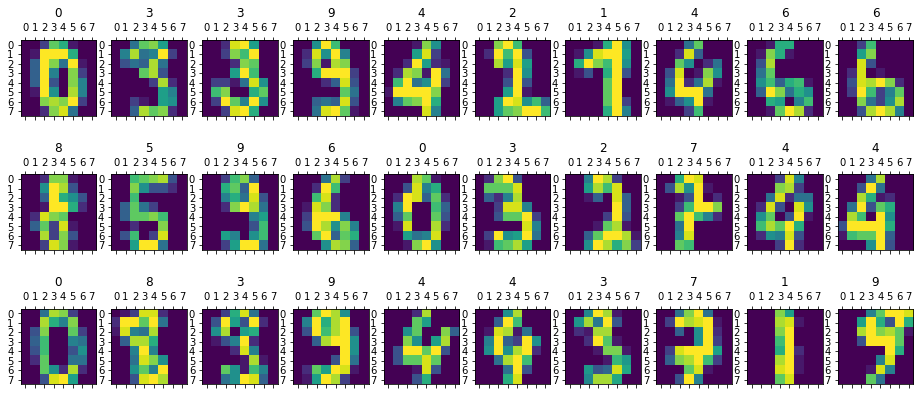

In [24]:
rndperm = np.random.permutation(df.shape[0])

fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((8,8)).astype(float))
plt.show()

## Select a subset of digits from the original dataset

In [25]:
# select digits from the data,
df_1 = df.loc[df['label'].isin(['0','4','6','9'])]

df_1.shape

(720, 65)

In [26]:
df_1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0


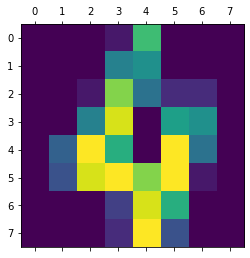

4


In [27]:
plt.matshow(df_1.iloc[1,0:64].values.reshape((8,8)).astype(float))
plt.show()
print(df_1.iloc[1,64])

## Applying PCA. The purpose: find lower dimensional representation of image data

In [28]:
# The last column is not part of data so we drop it
X = df_1.iloc[:,:-1]

# Only 720 images are selected, each has 8x8=64 pixels
X.shape

(720, 64)

In [29]:
pca = PCA()
pca.fit(X)

PCA()

In [30]:
X_transform = pca.transform(X)

In [31]:
X_transform[1,:]

array([-1.80017731e+01,  1.16043419e+01, -2.27192915e+00, -1.70329153e+01,
        4.16223773e+00,  4.88698582e+00, -8.39161905e+00, -5.83577111e+00,
       -6.06018491e+00,  1.89566469e+00,  1.48961000e+00,  1.09226805e+00,
       -1.06445214e+01,  2.31331478e-01,  2.98004133e+00, -2.01996641e+00,
        2.62792255e+00,  6.90930496e+00,  6.42439429e-01,  1.82435045e+00,
       -4.98368694e+00,  3.08442822e+00, -1.39024174e-01,  3.67655315e+00,
        2.75227303e+00, -1.88965966e+00,  2.25632071e+00, -3.69898492e+00,
       -3.94074263e+00, -9.74870334e-01, -1.54529045e+00,  3.74294782e-01,
        2.70469837e-01, -1.37075433e+00,  1.00681686e+00, -2.78677769e+00,
        8.06122816e-01, -9.33260696e-01,  1.32284903e-01,  2.92675038e-02,
        7.37334385e-02,  2.61658640e-01,  6.76832033e-01, -5.61240668e-01,
       -5.45149478e-01, -3.14589061e-01,  6.08150288e-02,  1.31774419e-02,
       -1.70661357e-02, -5.46335726e-02, -1.61320253e-01, -3.82296511e-02,
       -1.03870673e-01,  

### What do the above numbers mean? They represent the new coordinate in the transformed system.
 - PCA is to transform the original 64 dimensional space into a new 64 dimensional space
 - The first axis in the transformed space represent the direction along which the variation is the largest
 - The first number in above array is the first coordinate
 - The second number is the second coordinate
 - We will use the two numbers to represent the image

## Below we can visualize the 64 dimensional data using the first two numbers

In [32]:
X_transform.shape

(720, 64)

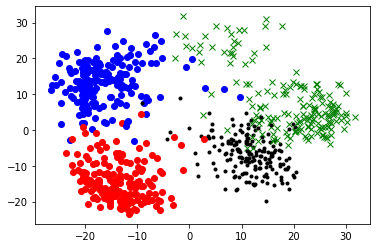

In [33]:
cc =''

for i in range(X_transform.shape[0]):
    t = df_1.iloc[i,-1]
    if  t == '0':
        cc = 'k.'
    elif t == '4':
        cc = 'bo'
    elif t == '6':
        cc ='ro'
    else:
        cc = 'gx'
    plt.plot(X_transform[i,0],X_transform[i,1],cc)

## Step 5. Analysis
 - Blue and red are quite separatable, meaning that pca makes it easy to tell 4 from 6
 - Green and black are somewhat entangled. It is not surprising because 0 and 9 are more mistakable.
 - Basically, the 4 clusters are well formed, meaning that we can apply k-means to classify the MNIST images.

## Your PCA task
- Select any 4 of the remaining digits you like
- Follow Step 3 to build a new data frame
- Follow Step 4 to use PCA to visualize your selected 4 digits
- From the visualization, is there any two digits that are harder to distinguish?

## Part 5. K-means to classify the hand-written digits
## The important parameters and methods in k-means
 - n_clusters: number of clusters (K in video). Here, we select K = 4
 - n_init: number of iteration in the k-means algorithm. Check the video and slides for details. Here, we set it to be 02
 - .fit: the main function of k-means. We need to plug the transformed data.
 - .labels_: to return the cluster assignment of each data point.
 - .cluster_centers_: return the coordinate. With this information, we can find out the correspondence between cluster label and digit label

In [34]:
km1 = KMeans(n_clusters=4, n_init=20)
km1.fit(X_transform[:,:2])

KMeans(n_clusters=4, n_init=20)

In [35]:
km1.labels_

array([3, 2, 1, 0, 3, 2, 1, 3, 3, 2, 1, 0, 3, 0, 1, 3, 3, 0, 2, 3, 3, 3,
       1, 2, 1, 1, 1, 2, 0, 3, 0, 3, 3, 1, 2, 1, 0, 1, 2, 2, 3, 1, 0, 1,
       2, 2, 0, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 0,
       1, 3, 0, 0, 2, 3, 3, 3, 1, 2, 1, 1, 1, 2, 0, 3, 0, 3, 3, 1, 0, 1,
       2, 2, 3, 1, 0, 1, 2, 2, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3,
       2, 1, 0, 3, 0, 1, 3, 0, 0, 2, 3, 3, 3, 1, 2, 1, 1, 1, 2, 0, 3, 0,
       3, 3, 1, 2, 1, 0, 1, 2, 2, 3, 1, 0, 1, 2, 2, 0, 2, 2, 0, 3, 0, 3,
       2, 1, 0, 3, 2, 1, 3, 3, 2, 1, 0, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 1,
       2, 1, 1, 1, 2, 0, 3, 0, 3, 3, 1, 2, 1, 0, 1, 2, 2, 3, 1, 3, 2, 2,
       2, 0, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 1, 0, 0, 2, 1, 3, 3, 0, 1,
       3, 0, 3, 2, 3, 3, 3, 1, 2, 1, 1, 1, 2, 0, 3, 0, 0, 3, 1, 2, 1, 3,
       1, 2, 2, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 1,
       2, 3, 2, 1, 0, 3, 2, 1, 3, 2, 2, 2, 3, 3, 2, 1, 2, 1, 1, 1, 2, 2,
       3, 2, 3, 3, 1, 2, 1, 0, 1, 2, 2, 3, 1, 2, 1,

In [36]:
km1.cluster_centers_

array([[ 20.38521559,   7.28636025],
       [-13.71206307, -14.61668388],
       [-15.47300356,  13.88752907],
       [ 11.45715566,  -6.58381492]])

## In above information, we can identify the correspondence between cluster center and digit label
 - centers[0] corresponds to black dots, which is digit '0'
 - centers[1] corresponds to blue dots, which is digit '4'
 - centers[2] corresponds to red dots, which is digit '6'
 - centers[3] corresponds to green crosses, which is digit '9'
 
## In the following cell, we can conver the cluster_centers into the label information

In [42]:
y_pred = []
temp_label = km1.labels_

for i in range(len(temp_label)):
    if temp_label[i] == 3:
        y_pred.append('0')
    elif temp_label[i] == 2:
        y_pred.append('4')
    elif temp_label[i] == 1:
        y_pred.append('6')
    else:
        y_pred.append('9')

In [43]:
y_true = df_1.label.values.reshape(-1,1)
y_true[:10]

array([['0'],
       ['4'],
       ['6'],
       ['9'],
       ['0'],
       ['4'],
       ['6'],
       ['9'],
       ['0'],
       ['4']], dtype=object)

In [44]:
y_pred[:10]

['0', '4', '6', '9', '0', '4', '6', '0', '0', '4']

## We can compare the true label (from df_1) and the predicted label, obtains the accuracy of the model.

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       178
           4       0.91      0.97      0.94       181
           6       0.98      0.97      0.97       181
           9       0.94      0.84      0.89       180

    accuracy                           0.93       720
   macro avg       0.93      0.93      0.93       720
weighted avg       0.93      0.93      0.93       720

